In [69]:
from keras.layers import Dense, Convolution2D, Activation, Flatten, Conv2D
from keras.layers import Dropout
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np

In [7]:
data = mnist.load_data()

In [68]:
def make_untrainable(model):
    model.trainable = False
    for layer in model.layers:
        layer.trainable = False
    

def make_trainable(model):
    model.trainable = True
    for layer in model.layers:
        layer.trainable = True

In [9]:
from keras.utils import to_categorical

In [347]:
# preprocess
(x_train, y_train), (x_test, y_test) = data
(y_train, y_test) = map(lambda x:to_categorical(x, 11), [y_train, y_test])
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

In [348]:
# testing data
x_train = x_train / 255
x_test = x_test / 255

In [349]:
# Discrimnator 

discriminator = Sequential()
discriminator.add(Dense(units = 28 * 28, input_dim = 784))
discriminator.add(Activation('tanh'))
discriminator.add(Activation('relu'))
discriminator.add(Dropout((14 * 14)/(28 * 28)))
discriminator.add(Dense(units = 14 * 14, input_dim = 14 * 14))
discriminator.add(Activation('tanh'))
discriminator.add(Activation('relu'))
discriminator.add(Dropout((7 * 7)/(14 * 14)))
discriminator.add(Dense(units = 7 * 7, input_dim = 7 * 7, activation = 'tanh'))
discriminator.add(Dense(units = 7 * 7, input_dim = 7 * 7, activation = 'relu'))
discriminator.add(Dense(units = 11, input_dim = 7 * 7, activation = 'sigmoid'))

discriminator.summary()
discriminator.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 784)               615440    
_________________________________________________________________
activation_93 (Activation)   (None, 784)               0         
_________________________________________________________________
activation_94 (Activation)   (None, 784)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 196)               153860    
_________________________________________________________________
activation_95 (Activation)   (None, 196)               0         
_________________________________________________________________
activation_96 (Activation)   (None, 196)               0         
__________

In [350]:
# training descriminator

discriminator.fit(x_train, y_train, batch_size= 50, verbose=1, epochs = 1, shuffle = True)

Epoch 1/1
60000/60000 [==============================] - 28s - loss: 0.2556 - acc: 0.9251    


In [351]:
# testing descriminator
print(discriminator.evaluate(x_test, y_test))



 9888/10000 [============================>.] - ETA: 0s[0.10431480226069689, 0.96930000000000005]


In [55]:
descriminator.save_weights("discriminator.hdf")

In [352]:
# Generator

generator = Sequential()
generator.add(Dense(units = 2, input_dim = 1,))
generator.add(Dense(units = 7 * 7))
generator.add(Dense(units = 7 * 7, input_dim = 7 * 7, activation = 'tanh'))
generator.add(Dense(units = 14 * 14, input_dim = 7 * 7, activation = 'relu'))
generator.add(Dense(units = 784, input_dim = 14 * 14, activation = 'sigmoid'))
generator.add(Dense(units = 784, input_dim = 784, activation = 'sigmoid'))

generator.summary()
generator.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_125 (Dense)            (None, 49)                147       
_________________________________________________________________
dense_126 (Dense)            (None, 49)                2450      
_________________________________________________________________
dense_127 (Dense)            (None, 196)               9800      
_________________________________________________________________
dense_128 (Dense)            (None, 784)               154448    
_________________________________________________________________
dense_129 (Dense)            (None, 784)               615440    
Total params: 782,289
Trainable params: 782,289
Non-trainable params: 0
_________________________________________________________________


In [353]:
model = Sequential()
model.add(generator)
model.add(discriminator)
# model.add(Dense(units = 1))

model.summary()
model.compile(loss="mse", optimizer="adagrad", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_32 (Sequential)   (None, 784)               782289    
_________________________________________________________________
sequential_31 (Sequential)   (None, 11)                781953    
Total params: 1,564,242
Trainable params: 1,564,242
Non-trainable params: 0
_________________________________________________________________


In [257]:
from IPython.display import clear_output
import time

In [355]:
# training loop
for I in range(10):
    make_untrainable(discriminator)
    make_trainable(generator)
    for i in range(10):
        clear_output()
        rand = np.array([[i % 10]])
        outs = np.array(to_categorical(i % 10, num_classes=11))
        print(outs.shape)
        model.fit(rand, outs, verbose = 1, epochs = 10)
    make_untrainable(generator)
    make_trainable(discriminator)
    for i in range(10):
        clear_output()
        rand = np.array([[i % 10]])
        outs = np.array(to_categorical(10, num_classes=11))
        print(outs.shape)
        model.fit(rand, outs, verbose = 1, epochs = 10)
    clear_output()
    print(discriminator.fit(x_train, y_train, batch_size= 50, verbose=1, epochs = 1, shuffle = True))  
#     print(discriminator.evaluate(x_train, y_train))   
    print(discriminator.evaluate(x_test, y_test))
    time.sleep(3)

Epoch 1/1
48200/60000 [=======================>......] - ETA: 5s - loss: 0.0325 - acc: 0.9906

KeyboardInterrupt: 

In [144]:
test_val = np.array([np.random.exponential(0.1)])
import matplotlib.pyplot as plt

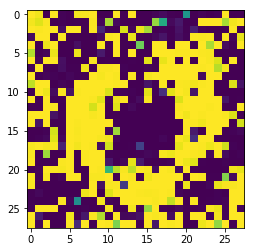

In [361]:
# tests
test_val = np.array([4])
new = generator.predict(test_val) 
# new.reshape((28, 28, 1))
plt.imshow(new.reshape((28, 28)))
plt.show()

In [175]:
np.random.rand()

0.8777793423910542